In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from scipy.stats import entropy


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [94]:
data = pd.read_csv("../prices.txt", sep="\\s+", header=None, index_col=None)
data = data.astype(np.float32)
data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,38.250000,69.059998,62.080002,31.799999,63.009998,28.299999,36.930000,43.230000,42.310001,67.370003,...,74.389999,41.299999,30.049999,39.529999,76.070000,28.620001,72.029999,24.020000,76.029999,27.500000
1,38.110001,69.980003,62.389999,31.740000,62.490002,28.230000,37.130001,42.849998,41.849998,68.410004,...,74.690002,41.700001,30.180000,38.930000,75.709999,28.469999,72.110001,24.040001,76.050003,27.540001
2,37.900002,69.559998,62.820000,31.570000,62.740002,28.600000,36.570000,42.990002,41.480000,69.839996,...,75.139999,41.139999,30.090000,38.169998,75.559998,28.480000,72.540001,23.760000,75.660004,27.549999
3,37.639999,69.389999,63.259998,31.559999,61.849998,28.670000,37.090000,43.230000,41.240002,70.360001,...,75.239998,41.380001,30.080000,38.240002,75.349998,28.590000,73.750000,23.969999,75.709999,27.740000
4,37.700001,69.709999,64.040001,31.420000,62.020000,28.420000,37.090000,42.900002,41.400002,69.120003,...,75.330002,41.689999,30.340000,37.849998,75.209999,28.549999,74.320000,24.010000,75.769997,27.540001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,37.200001,47.240002,47.099998,25.660000,41.450001,22.240000,23.719999,40.320000,15.130000,42.150002,...,98.389999,52.240002,19.639999,26.540001,78.010002,20.830000,78.470001,15.550000,67.349998,25.780001
1496,36.880001,46.910000,47.500000,26.070000,41.439999,22.100000,23.690001,40.090000,14.830000,41.799999,...,97.400002,52.939999,19.940001,26.299999,77.589996,20.980000,79.360001,15.520000,67.290001,26.049999
1497,36.990002,47.299999,47.669998,26.200001,41.680000,22.150000,23.520000,40.310001,14.670000,41.549999,...,96.919998,53.320000,19.920000,26.510000,77.839996,20.889999,78.669998,15.370000,67.010002,26.219999
1498,36.790001,47.230000,47.299999,25.730000,41.639999,22.129999,23.120001,40.570000,14.540000,42.310001,...,97.180000,54.099998,19.900000,26.549999,77.000000,20.790001,78.669998,15.450000,67.300003,26.440001


In [95]:
# Fit the linreg model
data_pct = data.sum(axis=1).pct_change().dropna()
X = []
y = []
for i in range(2, len(data_pct)):
    X.append([data_pct.iloc[i-1], data_pct.iloc[i-2]])
    y.append(data_pct.iloc[i])

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [97]:
model = LinearRegression()
# model = SVR(kernel='rbf', C=1.0, epsilon=0.1) # Worse than linear
model.fit(X_train, y_train)
# print(model.coef_, model.intercept_)

LinearRegression()

In [98]:
# Test direction and magnitude
def acc_trade_metric(y_test, y_pred, threshold=0.0005):
    error = 0
    for i in range(len(y_test)):
        # if (abs(y_test[i]) < threshold and abs(y_pred[i]) > threshold) \
        #     or (abs(y_test[i]) > threshold and abs(y_pred[i]) < threshold):
        #     error += 1
        
        if y_test[i] * y_pred[i] < 0:
            error += 1
    return 1 - error / len(y_test)
        

In [99]:
X_test

[[0.002821803, -0.0029971004],
 [0.0043922663, 0.004366517],
 [0.0005893707, 0.0016264915],
 [0.00015687943, -0.00063568354],
 [-0.0008301139, 0.0019158125],
 [-0.0031802058, -0.0011757016],
 [-9.906292e-05, 0.0018888712],
 [0.0020290613, 0.00039470196],
 [-0.001737535, -0.0001847148],
 [0.00066161156, 0.0033112764],
 [0.0015472174, -0.0005341172],
 [0.001354456, -0.0020150542],
 [0.0011264086, 0.0012581348],
 [7.6413155e-05, -0.0014664531],
 [0.0016024113, 0.0034127235],
 [0.0002720356, -0.0016257167],
 [0.0006786585, 0.00068724155],
 [-0.00079649687, -0.0008164048],
 [-0.0003646016, -0.00052142143],
 [-0.002743423, -0.0015904903],
 [0.00017559528, 0.0008819103],
 [-0.002177298, -0.00076943636],
 [0.001866579, 0.0034097433],
 [0.0011936426, 0.0016363859],
 [-0.001837492, -8.028746e-05],
 [0.0005887747, -0.0006055832],
 [0.00094366074, -0.00013178587],
 [0.0013420582, 0.0013616085],
 [-0.0013304949, -0.003079772],
 [0.0013129711, 0.0010946989],
 [0.0010088682, 0.00053453445],
 [-0.0019

In [100]:
y_test

[0.0011509657,
 0.00067949295,
 0.0021291971,
 -0.0007929802,
 0.00047838688,
 -0.0012239814,
 -0.0007650256,
 0.00049340725,
 0.0012601614,
 -0.00066125393,
 0.0013511181,
 0.0011888742,
 0.0005480051,
 0.0006517172,
 -0.001621306,
 0.00042760372,
 0.0018546581,
 0.0014420748,
 -0.002190709,
 0.0012581348,
 0.0011835098,
 -0.0016257167,
 0.0016961098,
 -0.003174305,
 0.0006865263,
 0.0013102293,
 -0.0018854737,
 -3.963709e-05,
 -0.0014780164,
 -4.1425228e-05,
 0.00043797493,
 0.0028342009,
 -0.003366053,
 0.0005159378,
 -0.00029826164,
 0.0024074316,
 0.00012862682,
 0.0027526617,
 -0.00150913,
 -0.0037371516,
 0.00023448467,
 -0.0008251667,
 -0.0013304949,
 0.002696991,
 -0.0022354126,
 0.0031958818,
 -0.0019571185,
 0.00017559528,
 0.0013616085,
 0.0007059574,
 -0.0018334985,
 0.0015472174,
 0.001458168,
 0.0017507076,
 0.0017136335,
 -0.0020423532,
 -0.004627645,
 0.00078964233,
 0.0020040274,
 -0.00045990944,
 0.00050354004,
 0.00071310997,
 -0.0008043051,
 -0.0030876994,
 -0.0019

In [101]:
# Base metrics
print(mean_squared_error(y_test, np.array(X_test)[:, 0]))
print(acc_trade_metric(y_test, np.array(X_test)[:, 0]))

3.0781262e-06
0.6533333333333333


In [102]:
print(mean_squared_error(y_test, model.predict(X_test)))
print(acc_trade_metric(y_test, model.predict(X_test)))

2.2117424e-06
0.6066666666666667


Correlation + comb digging

In [103]:
# Backward selection - to maximize correlation
def backward_selection(data_train: pd.Series):
    initial = set(range(50))
    seq = []
    length = []
    trimmeds = []
    while True:
        initial_corr = data_train[list(initial)].sum(axis=1).pct_change().dropna().autocorr(lag=1)
        best_corr = -1
        best_trimmed = None
        for j in initial:
            trimmed = initial - {j}
            corr = data_train[list(trimmed)].sum(axis=1).pct_change().dropna().autocorr(lag=1)
            if corr > best_corr:
                best_corr = corr
                best_trimmed = trimmed
        print(best_corr, best_trimmed)
        seq.append(best_corr)
        length.append(len(best_trimmed))
        trimmeds.append(best_trimmed)
        initial = best_trimmed
        if len(initial) == 1:
            break

    return seq, length, trimmeds



In [104]:
def test(data_test: pd.Series, chosen: set):
    data_test = data_test[list(chosen)].sum(axis=1).pct_change().dropna()
    return data_test.autocorr(lag=1)

0.4233652380636193 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.43104988756658974 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.436882565933382 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.44224612417434195 {0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.4467148894338279 {0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.

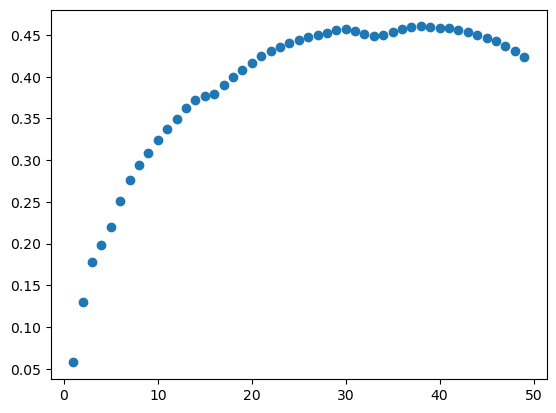

In [105]:
seq, length, trimmed = backward_selection(data.iloc[:1000])
plt.scatter(length, seq)

In [106]:
seq.index(max(seq))

11

In [107]:
test(data.iloc[1000:], trimmed[seq.index(max(seq))])

0.37621670686614306

In [108]:
print(list(trimmed[seq.index(max(seq))]))

[0, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49]


0.4233652380636193 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.43104988756658974 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.436882565933382 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.44224612417434195 {0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.4467148894338279 {0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.

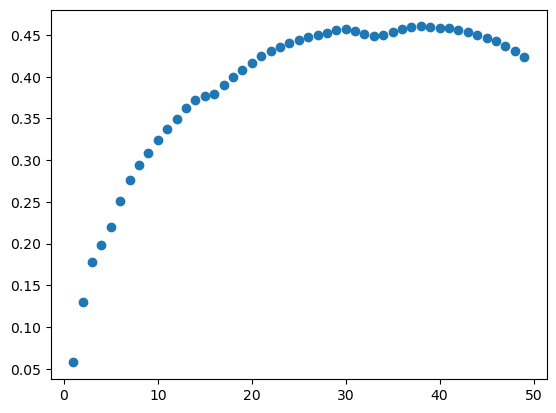

In [109]:
seq, length, trimmed = backward_selection(data.iloc[:1000])
print("Test:", test(data.iloc[1000:], trimmed[seq.index(max(seq))]))
print(list(trimmed[seq.index(max(seq))]))
plt.scatter(length, seq)

In [110]:
test(data.iloc[1000:], [i for i in range(50)])

0.341911955614931

0.42868607409505854 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.43540597530317465 {0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.44147368627898514 {0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.4456434633851328 {0, 1, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49}
0.44894697436688796 {0, 1, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 

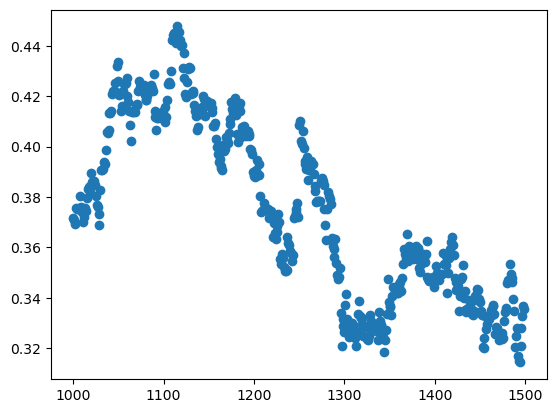

In [111]:
chosen = [0, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49]
result = []
for i in range(1000, 1500):
    if i % 250 == 0:
        seq, length, trimmed = backward_selection(data.iloc[:i-250])
        chosen = list(trimmed[seq.index(max(seq))])
    result.append(data.iloc[i-250:i][chosen].sum(axis=1).pct_change().dropna().autocorr(lag=1))
plt.scatter(range(1000, 1500), result)

In [112]:
data.sum(axis=1)

0       2380.860352
1       2384.890381
2       2384.730225
3       2386.370117
4       2390.510010
           ...     
1495    2310.220215
1496    2311.150391
1497    2316.690186
1498    2321.049805
1499    2320.329834
Length: 1500, dtype: float32

In [ ]:
# Dual annealing + differential evolution for testing
# TODO: Test those 3 times, then done
def compute_weights(df, init):
    from scipy.optimize import differential_evolution

    def test(weights):
        if ((df * weights).sum(1) < 500).sum() > 0:
            return 0
        return -abs((df * weights).sum(1).replace(0, 0.00001).pct_change().autocorr()) + 1/4 * entropy(np.abs(weights) / np.sum(np.abs(weights))) / np.log(len(weights))

    def cb(x, f):
        print(test(x))

    if init is None:
        init = np.ones(50)

    return differential_evolution(test, bounds=[(0,1)] * 50, callback=cb, x0=init, maxiter=1000).x



In [ ]:
def compute_weights_dual(df, init):
    from scipy.optimize import dual_annealing

    def test(weights):
        if ((df * weights).sum(1) < 500).sum() > 0:
            return 0
        return -abs((df * weights).sum(1).replace(0, 0.00001).pct_change().autocorr()) + 1/4 * entropy(np.abs(weights) / np.sum(np.abs(weights))) / np.log(len(weights))

    def cb(x, f, context):
        print(x, f, context)

    
    if init is None:
        init = np.ones(50)

    result = dual_annealing(test, [(0,1)] * 50, callback=cb, maxiter=2000, no_local_search=True, x0=init)
    return result.x

In [115]:
# result_evol = [-9.99925371e-01, -2.68425677e-02, -1.17435236e-02, -9.80035456e-04,
#        -2.87847866e-01, -9.98553622e-01, -1.55903512e-03, -2.25884277e-01,
#        -2.90641281e-01, -1.09641324e-01, -2.60593308e-01, -1.95272802e-01,
#        -4.84680823e-01, -9.99806776e-01, -1.78517533e-01, -2.25449529e-01,
#        -8.01128697e-01, -9.97869278e-01, -4.59408234e-03, -9.99924677e-01,
#        -9.97999150e-01, -9.98676284e-01, -2.40232548e-01, -2.75923076e-01,
#        -6.06011611e-01, -2.85172169e-01, -8.89712522e-04, -9.98086931e-01,
#        -7.46842409e-02, -3.11112645e-01,  7.64032022e-04, -2.17810259e-01,
#        -4.48163719e-01, -9.99685881e-01, -5.66833422e-01, -6.77963156e-01,
#        -4.60064461e-01, -3.67033909e-01, -9.99220016e-01, -9.99202993e-01,
#        -4.60275365e-03, -4.03132792e-01, -2.59480269e-01, -3.99291175e-04,
#        -5.12487731e-01, -9.98588735e-01, -3.65608970e-01, -9.99235975e-01,
#        -3.93944159e-01, -9.89829421e-01]

result_evol = compute_weights(data.iloc[0:750], None)
print(list(result_evol))
weighted = data.iloc[750:1250] * result_evol
weighted.sum(axis=1).pct_change().dropna().autocorr()

-0.20982988639502012
-0.22127852522154448
-0.22160505650400164
-0.22409837205612815
-0.23365925196552167
-0.23921492738731023
-0.24442788083158956
-0.24442788083158956
-0.24442788083158956
-0.2569884499378474
-0.2569884499378474
-0.25945138657543154
-0.2705758778903743
-0.2721450322269185
-0.2744681729748463
-0.2744681729748463
-0.2788707047783438
-0.2808382463229564
-0.2808382463229564
-0.2808382463229564
-0.2808382463229564
-0.28766274846482487
-0.28766274846482487
-0.2880569757483935
-0.2880569757483935
-0.2880569757483935
-0.2888787513118448
-0.2888787513118448
-0.2890350492072023
-0.2905546130950879
-0.2905546130950879
-0.29397944986475344
-0.29397944986475344
-0.29397944986475344
-0.29397944986475344
-0.29397944986475344
-0.29397944986475344
-0.29397944986475344
-0.29397944986475344
-0.29397944986475344
-0.29397944986475344
-0.2941187152110041
-0.2941187152110041
-0.2941187152110041
-0.2941187152110041
-0.29817029463851974
-0.29817029463851974
-0.29817029463851974
-0.298170294638

0.4838975058293524

0.5689202048214704


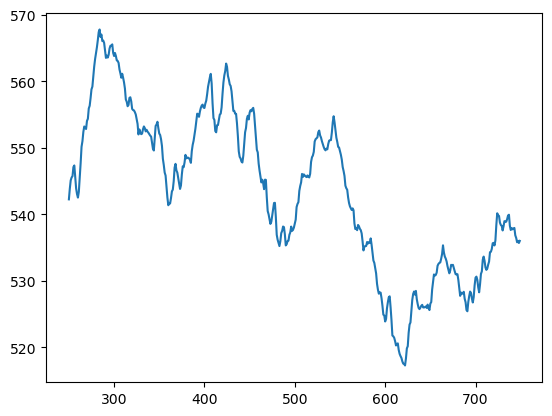

In [116]:
weighted = data.iloc[250:750] * result_evol
print(weighted.sum(axis=1).pct_change().dropna().autocorr())
plt.plot(weighted.sum(axis=1))

In [86]:
# result_dual = compute_weights_dual(data.iloc[:1000], None)
# print(result_dual)
# weighted = data.iloc[1000:] * result_dual
# weighted.sum(axis=1).replace(0, 0.00001).pct_change().dropna().autocorr()

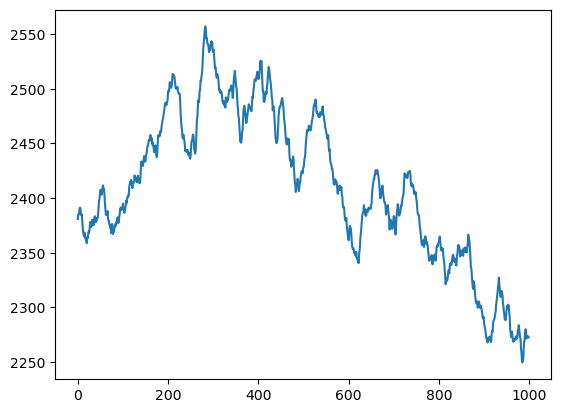

In [87]:
result_dual = [1 for i in range(50)]
plt.plot((data.iloc[:1000] * result_dual).sum(axis=1))

In [88]:
print(list(result_dual))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


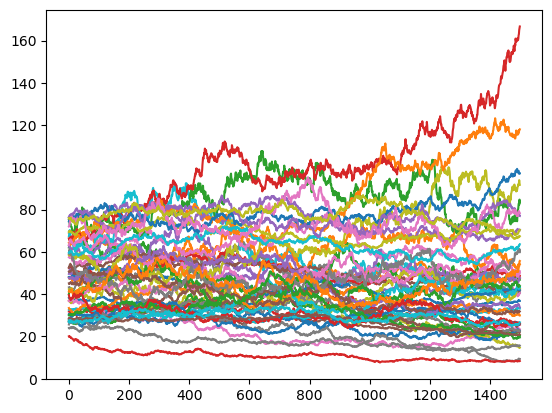

In [89]:
plt.plot(data)